In [3]:
import pandas as pd

url = "https://www.data.gouv.fr/fr/datasets/r/ea4f5879-af40-4e3e-949d-812d6eeb5e02"

data = pd.read_csv(url, delimiter=';')

recensement = data[['inst_numero', 'inst_nom', 'dep_nom', 'new_code', 'new_name', 'inst_etat', 
                    'inst_date_creation', 'inst_date_etat', 'inst_date_valid', 'inst_acc_handi_bool', 
                    'inst_trans_bool', 'equip_numero', 'equip_nom', 'equip_type_code', 
                    'equip_type_name', 'equip_type_famille', 'equip_x', 'equip_y', 
                    'equip_etat', 'equip_eclair', 'equip_douche', 'equip_sanit', 
                    'equip_pmr_aire', 'equip_pmr_douche', 'equip_pmr_sanit', 
                    'equip_travaux_date', 'equip_service_date', 'equip_travaux_type', 
                    'equip_energie', 'equip_prop_type', 'dens_lib', 'zrr_simp']]

/tmp/ipykernel_49704/601804400.py:5: DtypeWarning: Columns (4,6,57,69,103,105,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, delimiter=';')


In [4]:
print(data.head(10))
n_lignes = data.shape
print(f"Nombre de lignes : {n_lignes}")

  inst_numero                         inst_nom              inst_adresse  \
0  I562460004       Complexe sportif & Circuit         Rue de Malachappe   
1  I562460004       Complexe sportif & Circuit         Rue de Malachappe   
2  I562460004       Complexe sportif & Circuit         Rue de Malachappe   
3  I562470001                Parcours équestre          Bois des vallons   
4  I562470003                  Salle des fêtes           Parc du Ténénio   
5  I562470005      Complexe sportif de Sulniac                 Guernehué   
6  I562470011  Ecole primaire St-Jean-Baptiste             Rue Richemond   
7  I562470012               Boulodrome couvert  4 Résidence Pierre Guého   
8  I562480004       Centre aquatique aquagolfe            MOTTEN GRAETAL   
9  I562480005               Terrain des sports            Rue des sports   

   inst_cp inst_com_code inst_com_nom new_code  new_name  inst_actif  \
0  56300.0         56246     Le Sourn  56246.0  Le Sourn        True   
1  56300.0         

In [5]:
doublons = (recensement
            .groupby(['inst_nom', 'new_code'])
            .size()
            .reset_index(name='n')
            .query('n > 0'))
print(doublons.head)

<bound method NDFrame.head of                                  inst_nom new_code  n
0           "Aire de jeux" Calebassiers 3    97411  1
1                           "Le Sépulcre"    22187  2
2           "Le circuit de Saint Mathieu"    29190  1
3       "Le circuit de Saint-Demet" N° 22    29215  1
4             "le 107" saut à l'élastique    48094  1
...                                   ...      ... ..
157600                  étang des oiseaux  57255.0  1
157601                   étang des pelles    25085  1
157602                    étangs de pêche    42293  1
157603                    étape cavalière    69018  3
157604                  étrier de Moselle    57534  4

[157605 rows x 3 columns]>


In [26]:
distinct = recensement.drop_duplicates(subset=['inst_nom', 'new_code'], keep='first')

df_epure = pd.merge(distinct, doublons, on=['inst_nom', 'new_code'], how='outer')

/tmp/ipykernel_49704/2049927570.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')


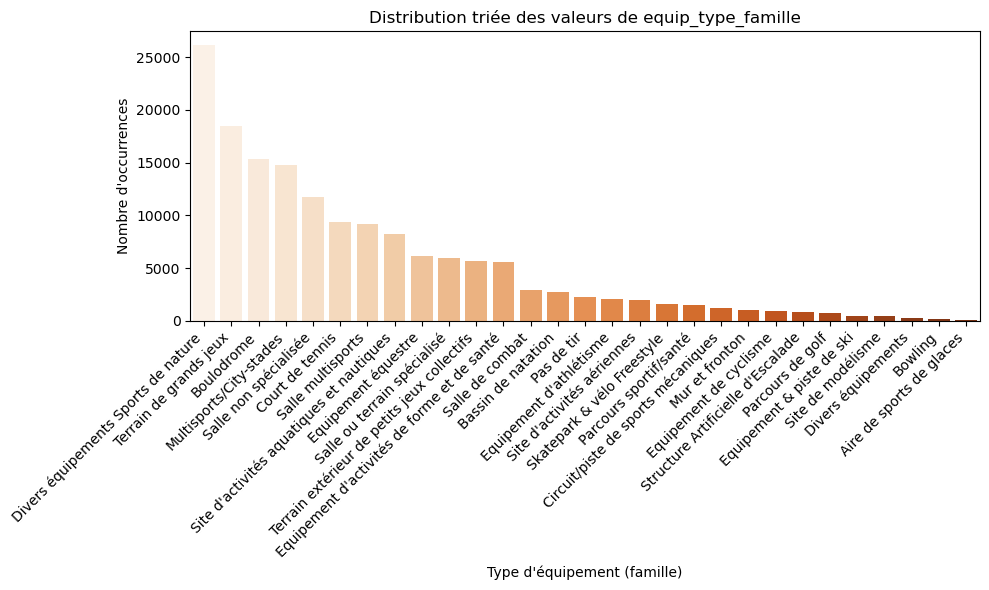

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une table de fréquences
freq_table = pd.DataFrame(df_epure['equip_type_famille'].value_counts()).reset_index()
freq_table.columns = ['Var1', 'Freq']

# Visualiser avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='Oranges')
plt.title("Distribution triée des valeurs de equip_type_famille")
plt.xlabel("Type d'équipement (famille)")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

boulodromes_dep = (df_epure[df_epure['equip_type_famille'] == "Boulodrome"]
                   .groupby('dep_nom')
                   .size()
                   .reset_index(name='nombre')
                   .sort_values(by='nombre', ascending=False))

/tmp/ipykernel_49704/3219396892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')


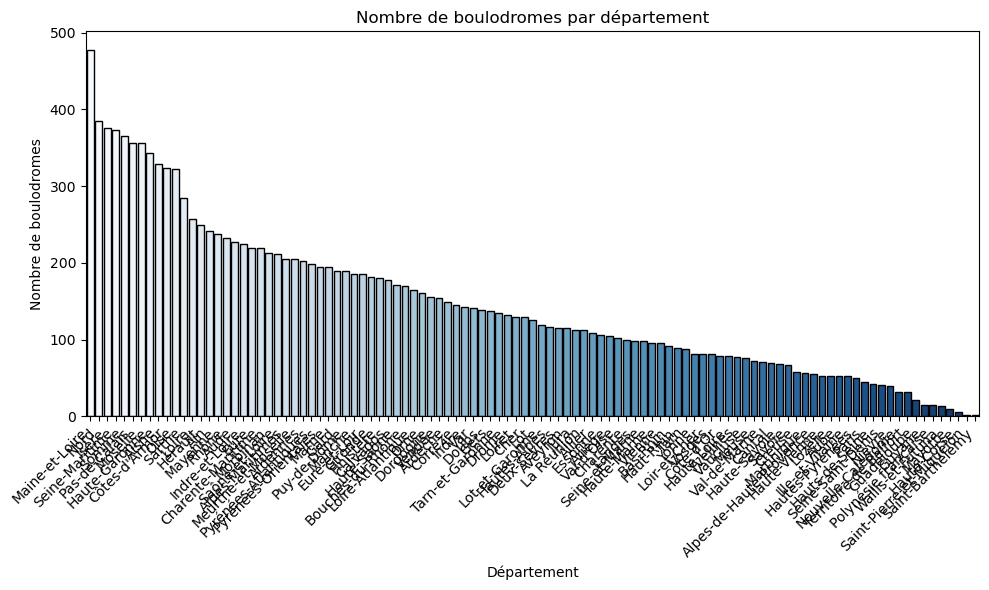

In [9]:
boulodromes_dep = df_epure[df_epure['equip_type_famille'] == "Boulodrome"] \
    .groupby('dep_nom') \
    .size() \
    .reset_index(name='nombre') \
    .sort_values(by='nombre', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='dep_nom', y='nombre', data=boulodromes_dep, palette='Blues', edgecolor='black')
plt.title("Nombre de boulodromes par département")
plt.xlabel("Département")
plt.ylabel("Nombre de boulodromes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
pip install geopandas pandas matplotlib cartopy rasterio numpy

Note: you may need to restart the kernel to use updated packages.


In [17]:
import geopandas as gpd

# Charger les frontières de la France (GeoJSON ou Shapefile)
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_FRA_0.json"  # Niveaux administratifs 0 (France entière)
france = gpd.read_file(url)

# Afficher les premières lignes
print(france.head())

# Vérifier le système de coordonnées (CRS)
print(france.crs)


  GID_0 COUNTRY                                           geometry
0   FRA  France  MULTIPOLYGON (((9.2585 41.346, 9.2576 41.3432,...
EPSG:4326


In [27]:
gdf = gpd.GeoDataFrame(
    df_epure,
    geometry=gpd.points_from_xy(df_epure["equip_x"], df_epure["equip_y"]),
    crs="EPSG:4326"  # WGS84 (coordonnées géographiques)
)
print(gdf)

       inst_numero                           inst_nom        dep_nom new_code  \
0       I974110158      "Aire de jeux" Calebassiers 3     La Réunion    97411   
1       I221870011                      "Le Sépulcre"  Côtes-d'Armor    22187   
2       I291900016      "Le circuit de Saint Mathieu"      Finistère    29190   
3       I292150008  "Le circuit de Saint-Demet" N° 22      Finistère    29215   
4       I480880001        "le 107" saut à l'élastique         Lozère    48094   
...            ...                                ...            ...      ...   
157603  I572550005                  étang des oiseaux        Moselle  57255.0   
157604  I250850001                   étang des pelles          Doubs    25085   
157605  I422930006                    étangs de pêche          Loire    42293   
157606  I690180006                    étape cavalière          Rhône    69018   
157607  I575340005                  étrier de Moselle        Moselle    57534   

                        new

In [29]:
# Reprojeter les frontières de la France si nécessaire
france = france.to_crs(gdf.crs)
print(france)

  GID_0 COUNTRY                                           geometry
0   FRA  France  MULTIPOLYGON (((9.2585 41.346, 9.2576 41.3432,...


In [30]:
# Filtrer les points situés en France
points_in_france = gdf[gdf.geometry.within(france.unary_union)]

# Afficher les points en France
print(points_in_france)

/tmp/ipykernel_49704/4121545868.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  points_in_france = gdf[gdf.geometry.within(france.unary_union)]


       inst_numero                           inst_nom              dep_nom  \
1       I221870011                      "Le Sépulcre"        Côtes-d'Armor   
2       I291900016      "Le circuit de Saint Mathieu"            Finistère   
3       I292150008  "Le circuit de Saint-Demet" N° 22            Finistère   
4       I480880001        "le 107" saut à l'élastique               Lozère   
5       I662120014                  0'PARC TYROLYENNE  Pyrénées-Orientales   
...            ...                                ...                  ...   
157603  I572550005                  étang des oiseaux              Moselle   
157604  I250850001                   étang des pelles                Doubs   
157605  I422930006                    étangs de pêche                Loire   
157606  I690180006                    étape cavalière                Rhône   
157607  I575340005                  étrier de Moselle              Moselle   

       new_code                  new_name inst_etat inst_date_c

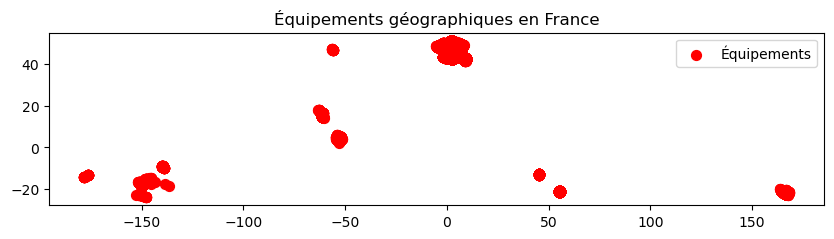

In [31]:
import matplotlib.pyplot as plt

# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 10))
france.plot(ax=ax, color="lightblue", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=50, label="Équipements")
plt.legend()
plt.title("Équipements géographiques en France")
plt.show()

/tmp/ipykernel_49704/4009745844.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", len(equip_types))  # Use a qualitative colormap
/tmp/ipykernel_49704/4009745844.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epure_metropole['color'] = df_epure_metropole['equip_type_famille'].map(color_dict)


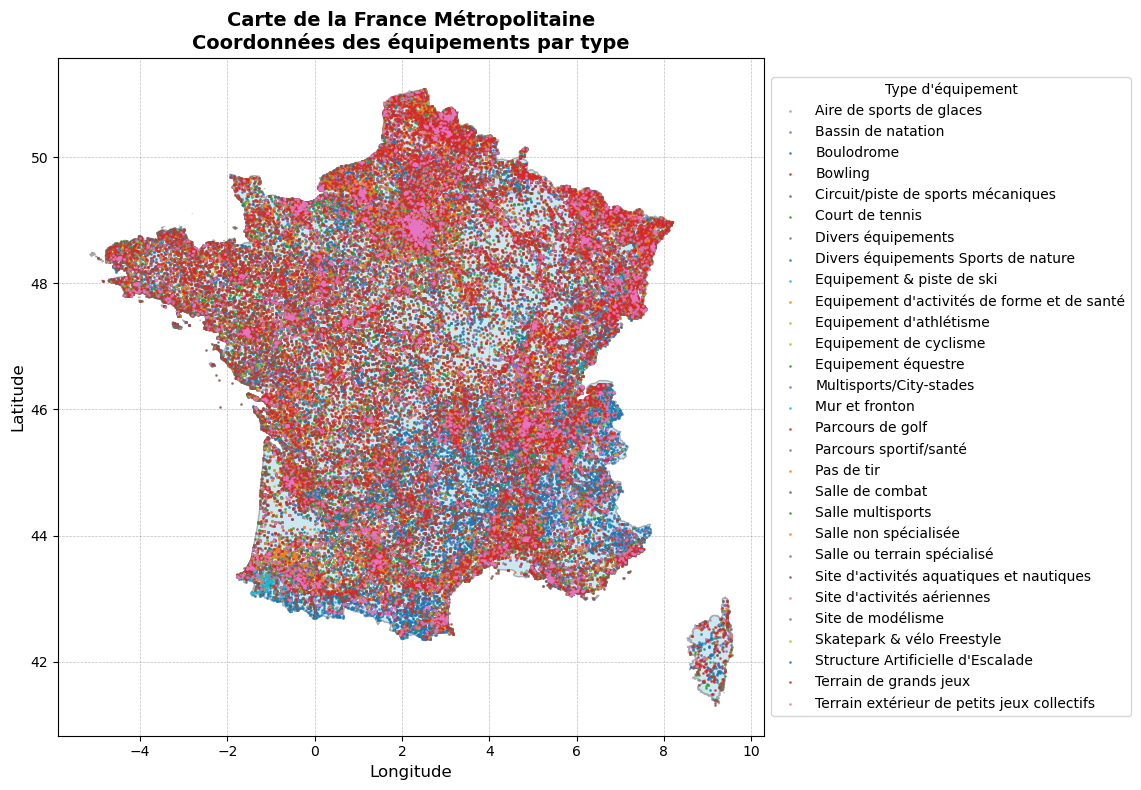

In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Crop France to metropolitan area
france_metropole = france.cx[-5:10, 41:52]

# Filter points to ensure they are in metropolitan France
df_epure_metropole = df_epure[
    (df_epure['equip_x'] >= -5) & 
    (df_epure['equip_x'] <= 10) & 
    (df_epure['equip_y'] >= 41) & 
    (df_epure['equip_y'] <= 52)
]

# Generate a color map for equipment types
equip_types = df_epure_metropole['equip_type_famille'].unique()
cmap = get_cmap("tab10", len(equip_types))  # Use a qualitative colormap
color_dict = {etype: cmap(i) for i, etype in enumerate(equip_types)}

# Assign colors to each equipment type
df_epure_metropole['color'] = df_epure_metropole['equip_type_famille'].map(color_dict)

# Create the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map of metropolitan France
france_metropole.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.6)

# Plot points with equipment types
for equip_type, group in df_epure_metropole.groupby('equip_type_famille'):
    ax.scatter(
        group['equip_x'],
        group['equip_y'],
        color=color_dict[equip_type],
        s=1,  # Adjust size for better visibility
        alpha=0.7,
        label=equip_type
    )

# Add legend
ax.legend(
    title="Type d'équipement",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# Customize the plot
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par type', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
import numpy as np
# Display frequency tables
print(df_epure['inst_acc_handi_bool'].value_counts())
print(df_epure['equip_pmr_aire'].value_counts())
print(df_epure['equip_pmr_sanit'].value_counts())

# Calculate handicap accessibility scores
score_handi = df_epure.copy()
score_handi['acc_handi'] = score_handi['inst_acc_handi_bool'].map({'true': 1, 'false': 0})
score_handi['acc_handi_aire'] = score_handi['equip_pmr_aire'].map({'true': 1, 'false': 0})
score_handi['acc_handi_sanit'] = score_handi['equip_pmr_sanit'].map({'true': 1, 'false': 0})

# Calculate average score
score_handi['score'] = round((score_handi['acc_handi'] + 
                            score_handi['acc_handi_aire'] + 
                            score_handi['acc_handi_sanit']) / 3, 2)

# Create contingency table between dens_lib and score
table_contingence = pd.crosstab(score_handi['dens_lib'], score_handi['score'])

# Calculate and display proportions
table_proportions = round(table_contingence / table_contingence.sum().sum() * 100, 2)
print(table_proportions)

# Create accessibility categories
conditions = [
    (score_handi['score'] == 0),
    (score_handi['score'] == 0.33),
    (score_handi['score'] == 0.67),
    (score_handi['score'] == 1)
]
choices = ['acces_nul', 'acces_min', 'acces_part', 'acces_total']
score_handi['accessibilite_pmr'] = np.select(conditions, choices, default=None)

inst_acc_handi_bool
True     85442
False    70136
Name: count, dtype: int64
equip_pmr_aire
False    77250
True     76757
Name: count, dtype: int64
equip_pmr_sanit
False    102573
True      24489
Name: count, dtype: int64
Empty DataFrame
Columns: []
Index: []


In [47]:
print(score_handi)

       inst_numero                           inst_nom        dep_nom new_code  \
0       I974110158      "Aire de jeux" Calebassiers 3     La Réunion    97411   
1       I221870011                      "Le Sépulcre"  Côtes-d'Armor    22187   
2       I291900016      "Le circuit de Saint Mathieu"      Finistère    29190   
3       I292150008  "Le circuit de Saint-Demet" N° 22      Finistère    29215   
4       I480880001        "le 107" saut à l'élastique         Lozère    48094   
...            ...                                ...            ...      ...   
157603  I572550005                  étang des oiseaux        Moselle  57255.0   
157604  I250850001                   étang des pelles          Doubs    25085   
157605  I422930006                    étangs de pêche          Loire    42293   
157606  I690180006                    étape cavalière          Rhône    69018   
157607  I575340005                  étrier de Moselle        Moselle    57534   

                        new

/opt/conda/lib/python3.12/site-packages/matplotlib/colors.py:1353: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/opt/conda/lib/python3.12/site-packages/matplotlib/colors.py:1360: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/opt/conda/lib/python3.12/site-packages/matplotlib/ticker.py:810: UserWarning: Warning: converting a masked element to nan.
  locs = (np.asarray(_locs) - self.offset) / 10. ** self.orderOfMagnitude


ValueError: cannot convert float NaN to integer

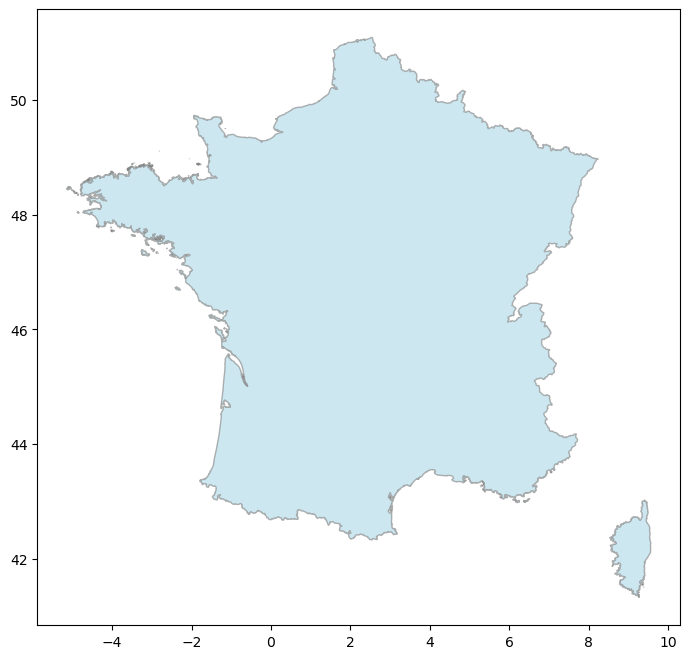

In [46]:
# Dictionnaire des couleurs pour chaque catégorie de 'accessibilite_pmr'
color_dict = {
    'acces_nul': 'red',
    'acces_min': 'orange',
    'acces_part': 'yellow',
    'acces_total': 'green'
}

# Filtrer les données pour la France métropolitaine
score_handi_metropole = score_handi[
    (score_handi['equip_x'] >= -5) & 
    (score_handi['equip_x'] <= 10) & 
    (score_handi['equip_y'] >= 41) & 
    (score_handi['equip_y'] <= 52)
]

# Créer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer la carte de la France métropolitaine
france_metropole.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.6)

# Tracer les points avec les informations d'accessibilité PMR
scatter = ax.scatter(
    score_handi_metropole['equip_x'],  # Longitude
    score_handi_metropole['equip_y'],  # Latitude
    c=score_handi_metropole['accessibilite_pmr'].map(color_dict),  # Appliquer la couleur en fonction de 'accessibilite_pmr'
    s=5,  # Taille des points ajustée
    alpha=0.6
)

# Ajouter la légende
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Accessibilité PMR", loc='center left', bbox_to_anchor=(1, 0.5))

# Ajouter les titres et labels
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par accessibilité', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Afficher la carte
plt.tight_layout()
plt.show()